In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# 구글 드라이브에서 공공데이터를 불러오고 프로그래밍한 결과, 시각화한 결과를 위해 필요한 코드 
# 나중에 다운로드 한 이미지를 편집하고 싶을 때 활용할 것

###파이썬 Opencv 라이브러리를 이용한 이미지 처리

- 이미지, 영상 처리는 우리가 일상에서 쉽게 접할 수 있고 쉽게 사용하는 기능(필터 등)
- Opencv 라이브러리를 우리가 이미지 처리를 할 수 있도록 도와주는 강력한 도구
- Opencv 라이브러리를 잘 활용하면 이미지에서 우리가 원하는 물체(도로 사진에서 자동차만) 또는 부분 (사람 사진에서 얼굴만) 추출할 수 있고
- 이를 다른 도구와 결합하면 이미지 인식 AI 프로그램도 만들 수 있음
- 이번 시간에 우리는 Opencv를 이용하여 컴퓨터에서 이미지가 저장되는 (부호화)되는 형식을 알아보고 일상에서 빈번하게 사용하는 이미지 처리의 원리를 탐구해보도록 합시다

In [1]:
import numpy as np #행렬 연산
import pandas as pd #데이터 처리
import cv2 as cv #이미지 처리 작업
from google.colab.patches import cv2_imshow   #구글에서 이미지 출력을 위한 도구
from skimage import io #이미지를 읽어오기 위한 도구 
from PIL import Image
import matplotlib.pylab as plt #이미지 수치 분석을 위한 도구

# 이미지 처리에 필요한 도구들을 불러옴

### 컴퓨터에서 색을 나타내는 방식?

- 컴퓨터는 바보라는 것을 늘 기억하자
- 컴퓨터는 색을 직접 인식할 수 있을까?
- https://encycolorpedia.kr/html
- 컴퓨터에서 색깔은 R,G,B의 숫자의 조합으로 나타낸다!

In [43]:

#urls 리스트에 3개의 이미지 주소를 저장

urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
       "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
      "https://placekitten.com/800/571"]  

 
for url in urls: #처음부터 끝까지 돌면서
  image = io.imread(url)  #1번 이미지는 BGR의 형태로 저장되어 있음
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)  #BGR로 되어 있는 이미지를 RGB 형태로 저장
  final_frame = cv.hconcat((image, image_2)) #1번 이미지와 2번 이미지를 한 프레임에 저장
  cv2_imshow(final_frame) #출력은 RGB로 출력해줌
  print('\n')

Output hidden; open in https://colab.research.google.com to view.

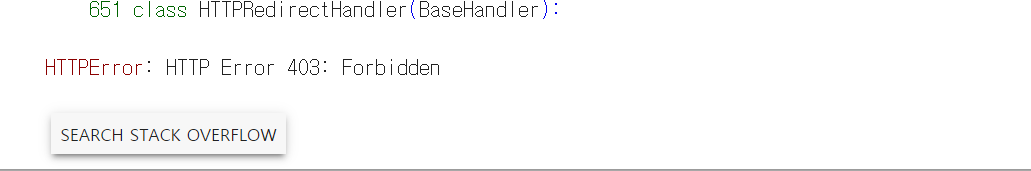

### 위 에러가 뜨면 이미지를 외부에서 사용하는걸 금지해놓은 것
- 다른 이미지를 찾으세요...

In [ ]:
### 여려분이 해보기 (포트폴리오!!!)

#url = ''
#myImg = io.imread(url)
#cv2_imshow(myImg)
#print()
#cv2_imshow(cv.cvtColor(myImg, cv.COLOR_BGR2RGB))

In [ ]:
# 이미지의 데이터 타입 알아보기 
print(image.dtype)
# 이미지의 높이 알아보기
print(image.shape[0])
# 이미지의 너비 알아보기 
print(image.shape[1])
# 이미지의 채널 알아보기 (색을 나타내는데 몇 가지 종류의 숫자를 사용하는가)
print(image.shape[2])

In [ ]:
### 여러분이 해보기(포트폴리오!!!)

print(.dtype)
# 이미지의 높이 알아보기
print(.shape[0])
# 이미지의 너비 알아보기 
print(.shape[1])
# 이미지의 채널 알아보기 (색을 나타내는데 몇 가지 종류의 숫자를 사용하는가)
print(.shape[2])

In [ ]:
# 모든 점들이 가진 값 : 높이 * 크기 * 채널 = 그림을 표현하는데 사용하는 데이터의 개수 
plt.hist(image.ravel(),bins = 256, range = [0,256]) 
plt.show()

In [ ]:
# 고양이 그림에서 b,g,r의 분포를 출력해줌 
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [ ]:
# 우리가 불러온  그림에서 b,g,r의 분포를 출력해줌 
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([],[i],None,[256],[0,256]) #[]안에 내가 불러온 그림의 r,g,b 분포를 알아봄
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [ ]:
# 고양이 그림을 회색으로 그레이스케일로 처리해줌

gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

In [ ]:
#그레이 스케일로 만들어진 내 이미지 숫자 분포를 히스토그램으로 표시함 

plt.hist(gray_image.ravel(),bins = 256, range = [0,256]) 
plt.show()

In [ ]:
# 내가 불러온 그림을 그레이스케일로 처리해줌 (포트폴리오)

gray_image2 = cv.cvtColor(, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

In [ ]:
#그레이 스케일로 만들어진 내 이미지 숫자 분포를 히스토그램으로 표시함

plt.hist(gray_image2.ravel(),bins = 256, range = [0,256]) 
plt.show()

### 이미지의 윤곽 찾기

In [ ]:
plt.figure(figsize=(8,7))
plt.contour(gray_image, origin = "image")

### 각 이미지의 점(픽셀) 수치 변경을 통한 이미지 편집

In [ ]:
# 이미지를 회색조로 바꾼 후 그 값을 255에서 빼면 흑백이 반전되는 효과를 가진다!
im2 =  - gray_image
cv2_imshow(im2)

In [ ]:
#100.0을 255로 나눈 값에 회색 이미지를 곱하고 100을 더하면
# 모든 점이 더 밝아지고 뿌얘지는 효과를 가진다.

im3 = (/255)*gray_image + 100
cv2_imshow(im3)

In [ ]:
# 아래의 절차를 거치면
#그레이스케일한 이미지의 밝기가 어두워진다.

im4 = 255.0*(gray_image/255.0)**2
cv2_imshow(im4)

In [ ]:
# 위에서 작업한 gray_image2를 바탕으로 위의 3절차를 진행하고 이를 출력해보자



